## Clean Label Attack

Setup complete. Libraries imported and styles configured.

Generated 1500 samples with 3 classes.
Training set size: 1050 samples.
Testing set size: 450 samples.
Classes: [0 1 2]
Feature shape: (1050, 2)

--- Visualizing Clean Training Data ---


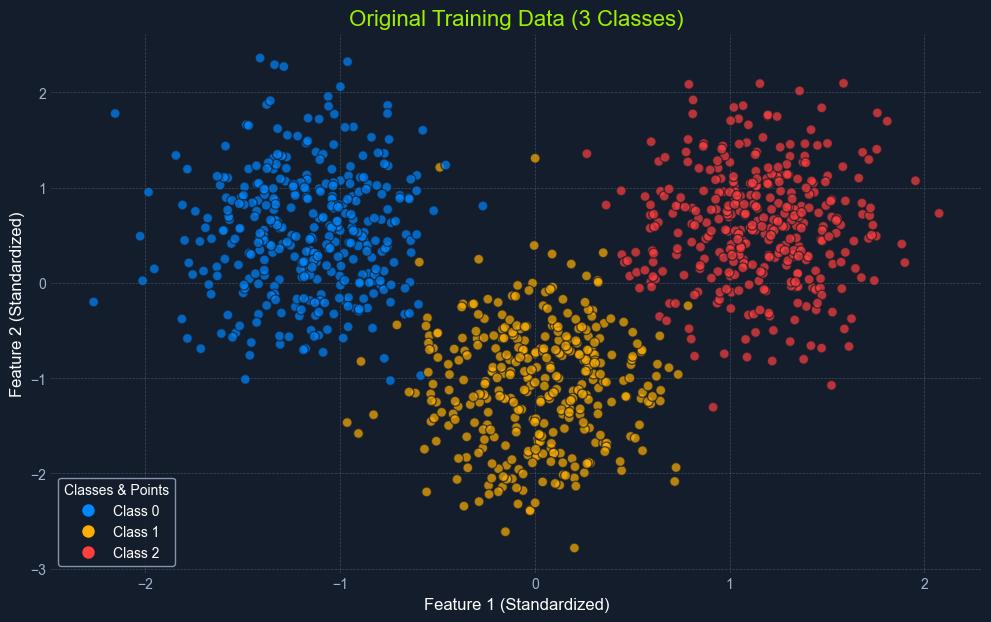

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns

# Color palette
htb_green = "#9fef00"
node_black = "#141d2b"
hacker_grey = "#a4b1cd"
white = "#ffffff"
azure = "#0086ff"       # Class 0
nugget_yellow = "#ffaf00" # Class 1
malware_red = "#ff3e3e"    # Class 2
vivid_purple = "#9f00ff"   # Highlight/Accent
aquamarine = "#2ee7b6"   # Highlight/Accent

# Configure plot styles
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams.update(
    {
        "figure.facecolor": node_black,
        "axes.facecolor": node_black,
        "axes.edgecolor": hacker_grey,
        "axes.labelcolor": white,
        "text.color": white,
        "xtick.color": hacker_grey,
        "ytick.color": hacker_grey,
        "grid.color": hacker_grey,
        "grid.alpha": 0.1,
        "legend.facecolor": node_black,
        "legend.edgecolor": hacker_grey,
        "legend.frameon": True,
        "legend.framealpha": 0.8, # Slightly transparent legend background
        "legend.labelcolor": white,
        "figure.figsize": (12, 7), # Default figure size
    }
)

# Seed for reproducibility - MUST BE 1337
SEED = 1337
np.random.seed(SEED)

print("Setup complete. Libraries imported and styles configured.")

# Generate 3-class synthetic data
n_samples = 1500
centers_3class = [(0, 6), (4, 3), (8, 6)]  # Centers for three blobs
X_3c, y_3c = make_blobs(
    n_samples=n_samples,
    centers=centers_3class,
    n_features=2,
    cluster_std=1.15, # Standard deviation of clusters
    random_state=SEED,
)

# Standardize features
scaler = StandardScaler()
X_3c_scaled = scaler.fit_transform(X_3c)

# Split data into training and testing sets, stratifying by class
X_train_3c, X_test_3c, y_train_3c, y_test_3c = train_test_split(
    X_3c_scaled, y_3c, test_size=0.3, random_state=SEED, stratify=y_3c
)

print(f"\nGenerated {n_samples} samples with 3 classes.")
print(f"Training set size: {X_train_3c.shape[0]} samples.")
print(f"Testing set size: {X_test_3c.shape[0]} samples.")
print(f"Classes: {np.unique(y_3c)}")
print(f"Feature shape: {X_train_3c.shape}")

def plot_data_multi(
    X,
    y,
    title="Multi-Class Dataset Visualization",
    highlight_indices=None,
    highlight_markers=None,
    highlight_colors=None,
    highlight_labels=None,
):
    """
    Plots a 2D multi-class dataset with class-specific colors and optional highlighting.
    Automatically ensures points marked with 'P' are plotted above all others.

    Args:
        X (np.ndarray): Feature data (n_samples, 2).
        y (np.ndarray): Labels (n_samples,).
        title (str): The title for the plot.
        highlight_indices (list | np.ndarray, optional): Indices of points in X to highlight. Defaults to None.
        highlight_markers (list, optional): Markers for highlighted points (recycled if shorter).
                                          Points with marker 'P' will be plotted on top. Defaults to ['o'].
        highlight_colors (list, optional): Edge colors for highlighted points (recycled). Defaults to [vivid_purple].
        highlight_labels (list, optional): Labels for highlighted points legend (recycled). Defaults to [''].
    """
    plt.figure(figsize=(12, 7))
    # Define colors based on the global palette for classes 0, 1, 2 (or more if needed)
    class_colors = [
        azure,
        nugget_yellow,
        malware_red,
    ]  # Extend if you have more than 3 classes
    unique_classes = np.unique(y)
    max_class_idx = np.max(unique_classes) if len(unique_classes) > 0 else -1
    if max_class_idx >= len(class_colors):
        print(
            f"{malware_red}Warning:{white} More classes ({max_class_idx + 1}) than defined colors ({len(class_colors)}). Using fallback color."
        )
        class_colors.extend([hacker_grey] * (max_class_idx + 1 - len(class_colors)))

    cmap_multi = plt.cm.colors.ListedColormap(class_colors)

    # Plot all non-highlighted points first
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap_multi,
        edgecolors=node_black,
        s=50,
        alpha=0.7,
        zorder=1,  # Base layer
    )

    # Plot highlighted points on top if specified
    highlight_handles = []
    if highlight_indices is not None and len(highlight_indices) > 0:
        num_highlights = len(highlight_indices)
        # Provide defaults if None
        _highlight_markers = (
            highlight_markers
            if highlight_markers is not None
            else ["o"] * num_highlights
        )
        _highlight_colors = (
            highlight_colors
            if highlight_colors is not None
            else [vivid_purple] * num_highlights
        )
        _highlight_labels = (
            highlight_labels if highlight_labels is not None else [""] * num_highlights
        )

        for i, idx in enumerate(highlight_indices):
            if not (0 <= idx < X.shape[0]):
                print(
                    f"{malware_red}Warning:{white} Invalid highlight index {idx} skipped."
                )
                continue

            # Determine marker, edge color, and label for this point
            marker = _highlight_markers[i % len(_highlight_markers)]
            edge_color = _highlight_colors[i % len(_highlight_colors)]
            label = _highlight_labels[i % len(_highlight_labels)]

            # Determine face color based on the point's true class
            point_class = y[idx]
            try:
                face_color = class_colors[int(point_class)]
            except (IndexError, TypeError):
                print(
                    f"{malware_red}Warning:{white} Class index '{point_class}' invalid. Using fallback."
                )
                face_color = hacker_grey

            current_zorder = (
                3 if marker == "P" else 2
            )  # If marker is 'P', use zorder 3, else 2

            # Plot the highlighted point
            plt.scatter(
                X[idx, 0],
                X[idx, 1],
                facecolors=face_color,
                edgecolors=edge_color,
                marker=marker,  # Use the determined marker
                s=180,
                linewidths=2,
                alpha=1.0,
                zorder=current_zorder,  # Use the zorder determined by the marker
            )
            # Create legend handle if label exists
            if label:
                highlight_handles.append(
                    plt.Line2D(
                        [0],
                        [0],
                        marker=marker,
                        color="w",
                        label=label,
                        markerfacecolor=face_color,
                        markeredgecolor=edge_color,
                        markersize=10,
                        linestyle="None",
                        markeredgewidth=1.5,
                    )
                )

    plt.title(title, fontsize=16, color=htb_green)
    plt.xlabel("Feature 1 (Standardized)", fontsize=12)
    plt.ylabel("Feature 2 (Standardized)", fontsize=12)

    # Create class legend handles
    class_handles = []
    unique_classes_present = sorted(np.unique(y))
    for class_idx in unique_classes_present:
        try:
            int_class_idx = int(class_idx)
            class_handles.append(
                plt.Line2D(
                    [0],
                    [0],
                    marker="o",
                    color="w",
                    label=f"Class {int_class_idx}",
                    markersize=10,
                    markerfacecolor=class_colors[int_class_idx],
                    markeredgecolor=node_black,
                    linestyle="None",
                )
            )
        except (IndexError, TypeError):
            print(
                f"{malware_red}Warning:{white} Cannot create legend entry for class {class_idx}."
            )

    # Combine legends
    all_handles = class_handles + highlight_handles
    if all_handles:
        plt.legend(handles=all_handles, title="Classes & Points")

    plt.grid(True, color=hacker_grey, linestyle="--", linewidth=0.5, alpha=0.3)
    plt.show()


# Plot the initial clean training data
print("\n--- Visualizing Clean Training Data ---")
plot_data_multi(X_train_3c, y_train_3c, title="Original Training Data (3 Classes)")

In [2]:
print("\n--- Training Baseline Model ---")
# Initialize the base estimator
# Using 'liblinear' solver as it's good for smaller datasets and handles OvR well.
# C=1.0 is the default inverse regularization strength.
base_estimator = LogisticRegression(random_state=SEED, C=1.0, solver="liblinear")

# Initialize the OneVsRestClassifier wrapper using the base estimator
baseline_model_3c = OneVsRestClassifier(base_estimator)

# Train the OvR model on the clean training data
baseline_model_3c.fit(X_train_3c, y_train_3c)
print("Baseline OvR model trained successfully.")

# Predict on the clean test set to evaluate baseline performance
y_pred_baseline_3c = baseline_model_3c.predict(X_test_3c)

# Calculate baseline accuracy
baseline_accuracy_3c = accuracy_score(y_test_3c, y_pred_baseline_3c)
print(f"Baseline 3-Class Model Accuracy on Test Set: {baseline_accuracy_3c:.4f}")

# Prepare meshgrid for plotting decision boundaries
# We create a grid of points covering the feature space
h = 0.02  # Step size in the mesh
x_min, x_max = X_train_3c[:, 0].min() - 1, X_train_3c[:, 0].max() + 1
y_min, y_max = X_train_3c[:, 1].min() - 1, X_train_3c[:, 1].max() + 1
xx_3c, yy_3c = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Combine xx and yy into pairs of coordinates for prediction
mesh_points_3c = np.c_[xx_3c.ravel(), yy_3c.ravel()]

# Predict classes for each point on the meshgrid using the trained baseline model
Z_baseline_3c = baseline_model_3c.predict(mesh_points_3c)
# Reshape the predictions back into the grid shape for contour plotting
Z_baseline_3c = Z_baseline_3c.reshape(xx_3c.shape)
print("Meshgrid predictions generated for baseline model.")

# Extract baseline model parameters (weights w_k and intercepts b_k)
# The fitted OvR classifier stores its individual binary estimators in the `estimators_` attribute
try:
    if (
        hasattr(baseline_model_3c, "estimators_")
        and len(baseline_model_3c.estimators_) == 3
    ):
        estimators_base = baseline_model_3c.estimators_
        # For binary LogisticRegression with liblinear, coef_ is shape (1, n_features) and intercept_ is (1,)
        # We extract them for each of the 3 binary classifiers (0 vs Rest, 1 vs Rest, 2 vs Rest)
        w0_base = estimators_base[0].coef_[0]  # Weight vector for class 0 vs Rest
        b0_base = estimators_base[0].intercept_[0]  # Intercept for class 0 vs Rest
        w1_base = estimators_base[1].coef_[0]  # Weight vector for class 1 vs Rest
        b1_base = estimators_base[1].intercept_[0]  # Intercept for class 1 vs Rest
        w2_base = estimators_base[2].coef_[0]  # Weight vector for class 2 vs Rest
        b2_base = estimators_base[2].intercept_[0]  # Intercept for class 2 vs Rest
        print(
            "Baseline model parameters (w0, b0, w1, b1, w2, b2) extracted successfully."
        )
    else:
        # This might happen if the model didn't fit correctly or classes were dropped
        raise RuntimeError(
            "Could not extract expected number of estimators from baseline OvR model."
        )
except Exception as e:
    print(f"Error: Failed to extract baseline parameters: {e}")


--- Training Baseline Model ---
Baseline OvR model trained successfully.
Baseline 3-Class Model Accuracy on Test Set: 0.9600
Meshgrid predictions generated for baseline model.
Baseline model parameters (w0, b0, w1, b1, w2, b2) extracted successfully.



--- Visualizing Baseline Model Decision Boundaries ---


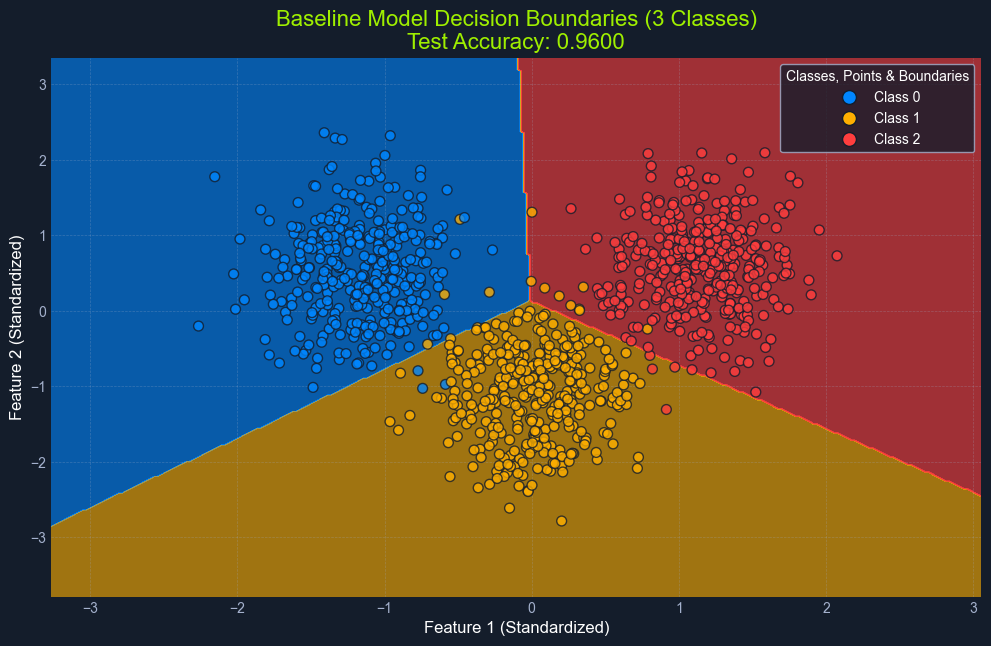

In [3]:
def plot_decision_boundary_multi(
    X,
    y,
    Z_mesh,
    xx_mesh,
    yy_mesh,
    title="Decision Boundary",
    highlight_indices=None,
    highlight_markers=None,
    highlight_colors=None,
    highlight_labels=None,
):
    """
    Plots the decision boundary regions and data points for a multi-class classifier.
    Automatically ensures points marked with 'P' are plotted above other points.
    Explicit boundary lines are masked to only show in relevant background regions.

    Args:
        X (np.ndarray): Feature data for scatter plot (n_samples, 2).
        y (np.ndarray): Labels for scatter plot (n_samples,).
        Z_mesh (np.ndarray): Predicted classes on the meshgrid (shape matching xx_mesh).
        xx_mesh (np.ndarray): Meshgrid x-coordinates.
        yy_mesh (np.ndarray): Meshgrid y-coordinates.
        title (str): Plot title.
        highlight_indices (list | np.ndarray, optional): Indices of points in X to highlight.
        highlight_markers (list, optional): Markers for highlighted points.
                                          Points with marker 'P' will be plotted on top.
        highlight_colors (list, optional): Edge colors for highlighted points.
        highlight_labels (list, optional): Labels for highlighted points legend.
        boundary_lines (dict, optional): Dict specifying boundary lines to plot, e.g.,
            {'label': {'coeffs': (w_diff_x, w_diff_y), 'intercept': b_diff, 'color': 'color', 'style': 'linestyle'}}
    """
    plt.figure(figsize=(12, 7))  # Consistent figure size

    # Define base class colors and slightly transparent ones for contour fill
    class_colors = [azure, nugget_yellow, malware_red]  # Extend if more classes as needed
    # Add fallback colors if needed based on y and Z_mesh
    unique_classes_y = np.unique(y)
    max_class_idx_y = np.max(unique_classes_y) if len(unique_classes_y) > 0 else -1
    unique_classes_z = np.unique(Z_mesh)
    max_class_idx_z = np.max(unique_classes_z) if len(unique_classes_z) > 0 else -1
    max_class_idx = int(max(max_class_idx_y, max_class_idx_z))  # Ensure integer type

    if max_class_idx >= len(class_colors):
        print(
            f"Warning: More classes ({max_class_idx + 1}) than defined colors ({len(class_colors)}). Using fallback grey."
        )
        # Ensure enough colors exist for indexing up to max_class_idx
        needed_colors = max_class_idx + 1
        current_colors = len(class_colors)
        if current_colors < needed_colors:
            class_colors.extend([hacker_grey] * (needed_colors - current_colors))

    # Appending '60' provides approx 37% alpha in hex RGBA for contour map
    # Ensure colors used for cmap match the number of classes exactly
    light_colors = [
        c + "60" if len(c) == 7 and c.startswith("#") else c
        for c in class_colors[: max_class_idx + 1]
    ]
    cmap_light = plt.cm.colors.ListedColormap(light_colors)

    # Plot the decision boundary contour fill
    plt.contourf(
        xx_mesh,
        yy_mesh,
        Z_mesh,
        cmap=cmap_light,
        alpha=0.6,
        zorder=0,  # Ensure contour is lowest layer
    )

    # Plot the data points
    # Ensure cmap for points matches number of classes in y
    cmap_bold = (
        plt.cm.colors.ListedColormap(class_colors[: int(max_class_idx_y) + 1])
        if max_class_idx_y >= 0
        else plt.cm.colors.ListedColormap(class_colors[:1])
    )
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap_bold,
        edgecolors=node_black,
        s=50,
        alpha=0.8,
        zorder=1,  # Points above contour
    )

    # Plot highlighted points if any
    highlight_handles = []
    if highlight_indices is not None and len(highlight_indices) > 0:
        num_highlights = len(highlight_indices)
        # Provide defaults if None
        _highlight_markers = (
            highlight_markers
            if highlight_markers is not None
            else ["o"] * num_highlights
        )
        _highlight_colors = (
            highlight_colors
            if highlight_colors is not None
            else [vivid_purple] * num_highlights
        )
        _highlight_labels = (
            highlight_labels if highlight_labels is not None else [""] * num_highlights
        )

        for i, idx in enumerate(highlight_indices):
            # Check index validity gracefully
            if not (0 <= idx < X.shape[0]):
                print(
                    f"Warning: Invalid highlight index {idx} skipped."
                )
                continue

            # Determine marker, edge color, and label for this point
            marker = _highlight_markers[i % len(_highlight_markers)]  # Get the marker
            edge_color = _highlight_colors[i % len(_highlight_colors)]
            label = _highlight_labels[i % len(_highlight_labels)]

            # Determine face color based on the point's true class from y
            try:
                # Ensure point_class is a valid integer index for class_colors
                point_class = int(y[idx])
                if not (0 <= point_class < len(class_colors)):
                    raise IndexError
                face_color = class_colors[point_class]
            except (IndexError, ValueError, TypeError):
                print(
                    f"Warning: Class index '{y[idx]}' invalid for highlighted point {idx}. Using fallback."
                )
                face_color = hacker_grey  # Fallback

            current_zorder = (
                3 if marker == "P" else 2
            )  # If marker is 'P', use zorder 3, else 2

            # Plot the highlighted point
            plt.scatter(
                X[idx, 0],
                X[idx, 1],
                facecolors=face_color,
                edgecolors=edge_color,
                marker=marker,  # Use the determined marker
                s=180,
                linewidths=2,
                alpha=1.0,  # Make highlighted points fully opaque
                zorder=current_zorder,  # Use the zorder determined by the marker
            )
            # Create legend handle if label exists
            if label:
                # Use Line2D for better control over legend marker appearance
                highlight_handles.append(
                    plt.Line2D(
                        [0],
                        [0],
                        marker=marker,
                        color="w",
                        label=label,
                        markerfacecolor=face_color,
                        markeredgecolor=edge_color,
                        markersize=10,
                        linestyle="None",
                        markeredgewidth=1.5,
                    )
                )

    plt.title(title, fontsize=16, color=htb_green)
    plt.xlabel("Feature 1 (Standardized)", fontsize=12)
    plt.ylabel("Feature 2 (Standardized)", fontsize=12)

    # Create class legend handles (based on unique classes in y)
    class_handles = []
    # Check if y is not empty before finding unique classes
    if y.size > 0:
        unique_classes_present_y = sorted(np.unique(y))
        for class_idx in unique_classes_present_y:
            try:
                int_class_idx = int(class_idx)
                # Check if index is valid for the potentially extended class_colors
                if 0 <= int_class_idx < len(class_colors):
                    class_handles.append(
                        plt.Line2D(
                            [0],
                            [0],
                            marker="o",
                            color="w",
                            label=f"Class {int_class_idx}",
                            markersize=10,
                            markerfacecolor=class_colors[int_class_idx],
                            markeredgecolor=node_black,
                            linestyle="None",
                        )
                    )
                else:
                    print(
                        f"Warning: Cannot create class legend entry for class {int_class_idx}, color index out of bounds after potential extension."
                    )
            except (ValueError, TypeError):
                print(
                    f"Warning: Cannot create class legend entry for non-integer class {class_idx}."
                )
    else:
        print(
            f"Info: No data points (y is empty), skipping class legend entries."
        )

    # Combine legends
    all_handles = class_handles + highlight_handles
    if all_handles:  # Only show legend if there's something to legend
        plt.legend(handles=all_handles, title="Classes, Points & Boundaries")

    plt.grid(True, color=hacker_grey, linestyle="--", linewidth=0.5, alpha=0.3)
    # Ensure plot limits strictly match the meshgrid range used for contourf
    plt.xlim(xx_mesh.min(), xx_mesh.max())
    plt.ylim(yy_mesh.min(), yy_mesh.max())
    plt.show()


# Plot the decision boundary for the baseline model using the pre-calculated Z_baseline_3c
print("\n--- Visualizing Baseline Model Decision Boundaries ---")
plot_decision_boundary_multi(
    X_train_3c,  # Training data points
    y_train_3c,  # Training labels
    Z_baseline_3c,  # Meshgrid predictions from baseline model
    xx_3c,  # Meshgrid x coordinates
    yy_3c,  # Meshgrid y coordinates
    title=f"Baseline Model Decision Boundaries (3 Classes)\nTest Accuracy: {baseline_accuracy_3c:.4f}",
)


--- Selecting Target Point ---
Boundary vector (w0-w1): [-5.78792514  6.32142485]
Intercept difference (b0-b1): -0.9207223376477076
Found 350 Class 1 points in the training set.

Selected Target Point Index (absolute): 373
Target Point Features: [-0.55111155 -0.36675028]
Target Point True Label (y_target): 1
Target Point Baseline Prediction: 1
Target Point Baseline 0-vs-1 Decision Value (f_01): -0.0493

--- Visualizing Training Data with Target Point ---


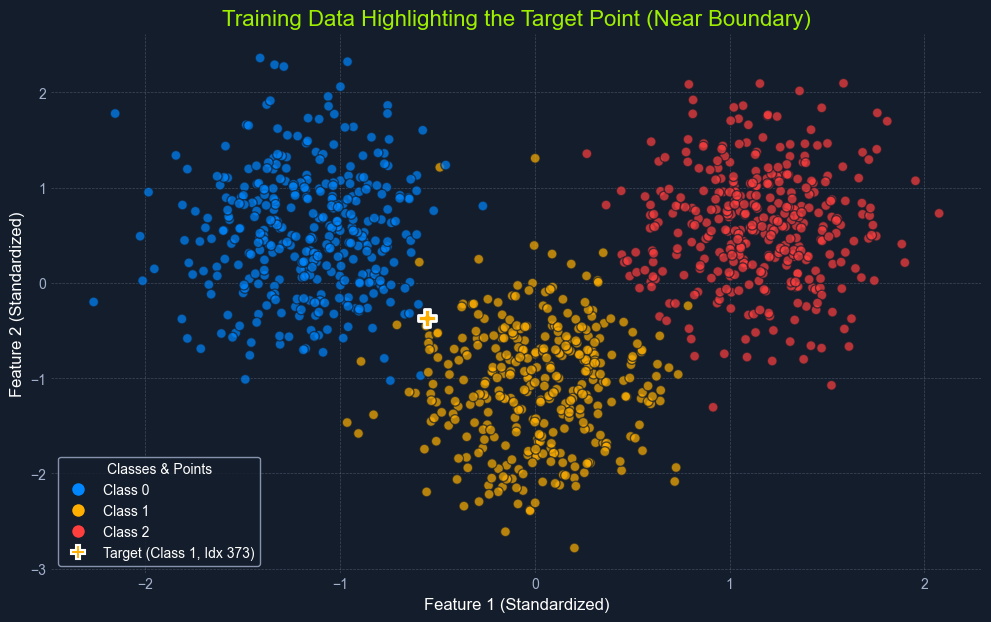

In [4]:
print("\n--- Selecting Target Point ---")
# We use the baseline parameters w0_base, b0_base, w1_base, b1_base extracted earlier
# Calculate the difference vector and intercept for the 0-vs-1 boundary
w_diff_01_base = w0_base - w1_base
b_diff_01_base = b0_base - b1_base
print(f"Boundary vector (w0-w1): {w_diff_01_base}")
print(f"Intercept difference (b0-b1): {b_diff_01_base}")


# Identify indices of all Class 1 points in the original clean training set
class1_indices_train = np.where(y_train_3c == 1)[0]

if len(class1_indices_train) == 0:
    raise ValueError(
        "CRITICAL: No Class 1 points found in the training data. Cannot select target."
    )
else:
    print(f"Found {len(class1_indices_train)} Class 1 points in the training set.")

# Get the feature vectors for only the Class 1 points
X_class1_train = X_train_3c[class1_indices_train]

# Calculate the decision function f_01(x) = (w0-w1)^T x + (b0-b1) for these Class 1 points
# A negative value means the point is on the Class 1 side of the 0-vs-1 boundary
decision_values_01 = X_class1_train @ w_diff_01_base + b_diff_01_base

# Find indices within the subset of Class 1 points that are correctly classified (f_01 < 0)
class1_on_correct_side_indices_relative = np.where(decision_values_01 < 0)[0]

if len(class1_on_correct_side_indices_relative) == 0:
    # This case is unlikely if the baseline model has decent accuracy, but handle it.
    print(
        f"{malware_red}Warning:{white} No Class 1 points found on the expected side (f_01 < 0) of the 0-vs-1 baseline boundary."
    )
    print(
        "Selecting the Class 1 point with the minimum absolute decision value instead."
    )
    # Find index (relative to class1 subset) with the smallest absolute distance to boundary
    target_point_index_relative = np.argmin(np.abs(decision_values_01))
else:
    # Among the correctly classified points, find the one closest to the boundary
    # This corresponds to the maximum (least negative) decision value
    target_point_index_relative = class1_on_correct_side_indices_relative[
        np.argmax(decision_values_01[class1_on_correct_side_indices_relative])
    ]

# Map the relative index (within the class1 subset) back to the absolute index in the original X_train_3c array
target_point_index_absolute = class1_indices_train[target_point_index_relative]

# Retrieve the target point's features and true label
X_target = X_train_3c[target_point_index_absolute]
y_target = y_train_3c[
    target_point_index_absolute
]  # Should be 1 based on selection logic

# Sanity Check: Verify the chosen point's class and baseline prediction
target_baseline_pred = baseline_model_3c.predict(X_target.reshape(1, -1))[0]
target_decision_value = decision_values_01[target_point_index_relative]

print(f"\nSelected Target Point Index (absolute): {target_point_index_absolute}")
print(f"Target Point Features: {X_target}")
print(f"Target Point True Label (y_target): {y_target}")
print(f"Target Point Baseline Prediction: {target_baseline_pred}")
print(
    f"Target Point Baseline 0-vs-1 Decision Value (f_01): {target_decision_value:.4f}"
)

if y_target != 1:
    print(
        f"Error: Selected target point does not have label 1! Check logic."
    )
if target_baseline_pred != y_target:
    print(
        f"Warning: Baseline model actually misclassifies the chosen target point ({target_baseline_pred}). Attack might trivially succeed or have unexpected effects."
    )
if target_decision_value >= 0:
    print(
        f"Warning: Selected target point has f_01 >= 0 ({target_decision_value:.4f}), meaning it wasn't on the Class 1 side of the 0-vs-1 boundary. Check logic or baseline model."
    )

# Visualize the data highlighting the selected target point near the boundary
print("\n--- Visualizing Training Data with Target Point ---")
plot_data_multi(
    X_train_3c,
    y_train_3c,
    title="Training Data Highlighting the Target Point (Near Boundary)",
    highlight_indices=[target_point_index_absolute],
    highlight_markers=["P"],  # 'P' for Plus sign marker (Target)
    highlight_colors=[white],  # White edge color for visibility
    highlight_labels=[f"Target (Class {y_target}, Idx {target_point_index_absolute})"],
)

## Attack implementation

In [5]:
print("\n--- Identifying Class 0 Neighbors to Perturb ---")
n_neighbors_to_perturb = 5 # Hyperparameter: How many neighbors to modify

# Find indices of all Class 0 points in the original training set
class0_indices_train = np.where(y_train_3c == 0)[0]

if len(class0_indices_train) == 0:
    raise ValueError("CRITICAL: No Class 0 points found. Cannot find neighbors to perturb.")
else:
    print(f"Found {len(class0_indices_train)} Class 0 points in the training set.")

# Get features of only Class 0 points
X_class0_train = X_train_3c[class0_indices_train]

# Sanity check to ensure we don't request more neighbors than available
if n_neighbors_to_perturb > len(X_class0_train):
    print(f"Warning: Requested {n_neighbors_to_perturb} neighbors, but only {len(X_class0_train)} Class 0 points available. Using all available.")
    n_neighbors_to_perturb = len(X_class0_train)

if n_neighbors_to_perturb == 0:
    raise ValueError("No Class 0 neighbors can be selected to perturb (n_neighbors_to_perturb=0). Cannot proceed.")

# Initialize and fit NearestNeighbors on the Class 0 data points
# We use the default Euclidean distance ('minkowski' with p=2)
nn_finder = NearestNeighbors(n_neighbors=n_neighbors_to_perturb, algorithm='auto')
nn_finder.fit(X_class0_train)

# Find the indices (relative to X_class0_train) and distances of the k nearest Class 0 neighbors to X_target
distances, indices_relative = nn_finder.kneighbors(X_target.reshape(1, -1))

# Map the relative indices found within X_class0_train back to the original indices in X_train_3c
neighbor_indices_absolute = class0_indices_train[indices_relative.flatten()]
# Get the original feature vectors of these neighbors (needed for perturbation)
X_neighbors = X_train_3c[neighbor_indices_absolute]

# Output the findings for verification
print(f"\nTarget Point Index: {target_point_index_absolute} (True Class {y_target})")
print(f"Identified {len(neighbor_indices_absolute)} closest Class 0 neighbors to perturb:")
print(f"  Indices in X_train_3c: {neighbor_indices_absolute}")
print(f"  Distances to target: {distances.flatten()}")

# Sanity check: Ensure the target itself wasn't accidentally included (e.g., if it was mislabeled or data is unusual)
if target_point_index_absolute in neighbor_indices_absolute:
     print(f"Error: The target point itself was selected as one of its own Class 0 neighbors. This indicates a potential issue in data or logic.")


--- Identifying Class 0 Neighbors to Perturb ---
Found 350 Class 0 points in the training set.

Target Point Index: 373 (True Class 1)
Identified 5 closest Class 0 neighbors to perturb:
  Indices in X_train_3c: [ 761   82 1035  919  491]
  Distances to target: [0.10318016 0.12277741 0.14917583 0.25081115 0.30161621]


In [6]:
print("\n--- Calculating Perturbation Vector ---")
# Use the boundary vector w_diff_01_base = w0_base - w1_base calculated earlier

# The direction to push Class 0 points into Class 1 region is opposite to the normal vector (w0-w1)
push_direction = -w_diff_01_base
norm_push_direction = np.linalg.norm(push_direction)

# Handle potential zero vector for the boundary normal
if norm_push_direction < 1e-9: # Use a small threshold for floating point comparison
    raise ValueError("Boundary vector norm (||w0-w1||) is close to zero. Cannot determine push direction reliably.")
else:
    # Normalize the direction vector to unit length
    unit_push_direction = push_direction / norm_push_direction
    print(f"Calculated unit push direction vector (normalized - (w0-w1)): {unit_push_direction}")

# Define perturbation magnitude (how far across the boundary to push)
epsilon_cross = 0.25
print(f"Perturbation magnitude (epsilon_cross): {epsilon_cross}")

# Calculate the final perturbation vector (direction * magnitude)
perturbation_vector = epsilon_cross * unit_push_direction
print(f"Final perturbation vector (delta): {perturbation_vector}")


--- Calculating Perturbation Vector ---
Calculated unit push direction vector (normalized - (w0-w1)): [ 0.67529883 -0.73754423]
Perturbation magnitude (epsilon_cross): 0.25
Final perturbation vector (delta): [ 0.16882471 -0.18438606]



--- Applying Perturbations to Create Poisoned Dataset ---
  Neighbor Index 761 (Label 0): Perturbed.
     Original f01 = 0.7794 (>0 expected), Perturbed f01 = -1.3633 (<0 expected)
  Neighbor Index 82 (Label 0): Perturbed.
     Original f01 = 0.8696 (>0 expected), Perturbed f01 = -1.2732 (<0 expected)
  Neighbor Index 1035 (Label 0): Perturbed.
     Original f01 = 1.1145 (>0 expected), Perturbed f01 = -1.0282 (<0 expected)
  Neighbor Index 919 (Label 0): Perturbed.
     Original f01 = 2.0862 (>0 expected), Perturbed f01 = -0.0566 (<0 expected)
  Neighbor Index 491 (Label 0): Perturbed.
     Original f01 = 0.9021 (>0 expected), Perturbed f01 = -1.2406 (<0 expected)

Created poisoned training dataset by perturbing features of 5 Class 0 points.
Poisoned training dataset size: 1050 samples (should match original 1050).

--- Visualizing Poisoned Training Data ---


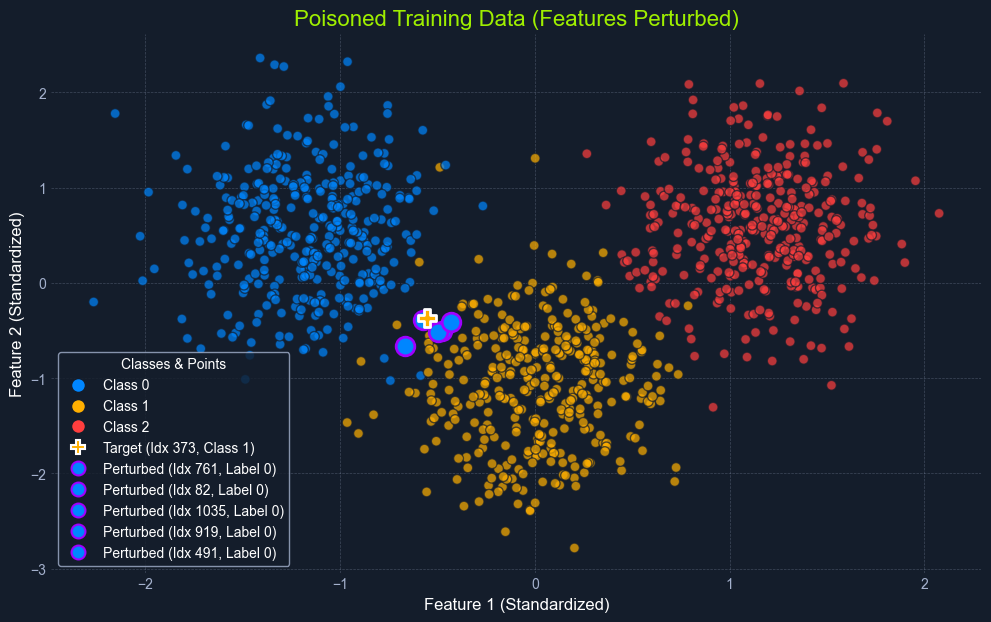

In [7]:
print("\n--- Applying Perturbations to Create Poisoned Dataset ---")
# Create a safe copy of the original training data to modify
X_train_poisoned = X_train_3c.copy()
y_train_poisoned = (
    y_train_3c.copy()
)  # Labels are copied but not changed for perturbed points

perturbed_indices_list = []  # Keep track of which indices were actually modified

# Iterate through the identified neighbor indices and their original features
# neighbor_indices_absolute holds the indices in X_train_3c/y_train_3c
# X_neighbors holds the corresponding original feature vectors
for i, neighbor_idx in enumerate(neighbor_indices_absolute):
    X_neighbor_original = X_neighbors[i]  # Original feature vector of the i-th neighbor

    # Calculate the new position of the perturbed neighbor
    X_perturbed_neighbor = X_neighbor_original + perturbation_vector

    # Replace the original neighbor's features with the perturbed features in the copied dataset
    X_train_poisoned[neighbor_idx] = X_perturbed_neighbor
    # The label y_train_poisoned[neighbor_idx] remains 0 (Class 0)

    perturbed_indices_list.append(neighbor_idx)  # Record the index that was modified

    # Verify the effect of perturbation on the f_01 score
    f01_orig = X_neighbor_original @ w_diff_01_base + b_diff_01_base
    f01_pert = X_perturbed_neighbor @ w_diff_01_base + b_diff_01_base
    print(f"  Neighbor Index {neighbor_idx} (Label 0): Perturbed.")
    print(
        f"     Original f01 = {f01_orig:.4f} (>0 expected), Perturbed f01 = {f01_pert:.4f} (<0 expected)"
    )
    if f01_pert >= 0:
        print(
            f"     Warning: Perturbed point did not cross the baseline boundary (f01 >= 0). Epsilon might be too small."
        )

print(
    f"\nCreated poisoned training dataset by perturbing features of {len(perturbed_indices_list)} Class 0 points."
)
# Check the size to ensure it's unchanged
print(
    f"Poisoned training dataset size: {X_train_poisoned.shape[0]} samples (should match original {X_train_3c.shape[0]})."
)

# Convert list to numpy array for potential use later
perturbed_indices_arr = np.array(perturbed_indices_list)

# Final safety check: ensure target wasn't modified
if target_point_index_absolute in perturbed_indices_arr:
    print(
        f"CRITICAL Error: Target point index {target_point_index_absolute} was included in the perturbed indices! Check neighbor finding logic."
    )

# Visualize the poisoned dataset, highlighting target and perturbed points
print("\n--- Visualizing Poisoned Training Data ---")
plot_data_multi(
    X_train_poisoned,  # Use the poisoned features
    y_train_poisoned,  # Use the corresponding labels (perturbed points still have label 0)
    title="Poisoned Training Data (Features Perturbed)",
    highlight_indices=[target_point_index_absolute] + perturbed_indices_list,
    highlight_markers=["P"]
    + ["o"]
    * len(perturbed_indices_list),  # 'P' for Target, 'o' for Perturbed neighbors
    highlight_colors=[white]
    + [vivid_purple]
    * len(perturbed_indices_list),  # White edge Target, Purple edge Perturbed
    highlight_labels=[f"Target (Idx {target_point_index_absolute}, Class {y_target})"]
    + [f"Perturbed (Idx {idx}, Label 0)" for idx in perturbed_indices_list],
)

### Evaluating the Clean Label Attack

In [8]:
print("\n--- Training Poisoned Model (Clean Label Attack) ---")

# Initialize a new base estimator for the poisoned model (same settings as baseline)
poisoned_base_estimator = LogisticRegression(
    random_state=SEED, C=1.0, solver="liblinear"
)
# Initialize the OneVsRestClassifier wrapper
poisoned_model_cl = OneVsRestClassifier(poisoned_base_estimator)

# Train the model on the POISONED training data
poisoned_model_cl.fit(X_train_poisoned, y_train_poisoned)

print("Poisoned model (Clean Label) trained successfully.")


--- Training Poisoned Model (Clean Label Attack) ---
Poisoned model (Clean Label) trained successfully.


In [9]:
print("\n--- Evaluating Poisoned Model Performance ---")

# Check the prediction for the specific target point
X_target_reshaped = X_target.reshape(1, -1)  # Reshape for single prediction
target_pred_poisoned = poisoned_model_cl.predict(X_target_reshaped)[0]

print(f"Target Point Evaluation:")
print(f"  Original True Label (y_target): {y_target}")
print(f"  Baseline Model Prediction:      {target_baseline_pred}")
print(f"  Poisoned Model Prediction:      {target_pred_poisoned}")

attack_successful = (target_pred_poisoned != y_target) and (
    target_pred_poisoned == 0
)  # Specifically check if flipped to Class 0

if attack_successful:
    print(
        f"  Success: The poisoned model misclassified the target point as Class {target_pred_poisoned}."
    )
else:
    if target_pred_poisoned == y_target:
        print(
            f"  Failure: The poisoned model still correctly classified the target point as Class {target_pred_poisoned}."
        )
    else:
        print(
            f"  Partial/Unexpected: The poisoned model misclassified the target point, but as Class {target_pred_poisoned}, not the intended Class 0."
        )


# Evaluate overall accuracy on the clean test set
y_pred_poisoned_test = poisoned_model_cl.predict(X_test_3c)
poisoned_accuracy_test = accuracy_score(y_test_3c, y_pred_poisoned_test)

print(f"\nOverall Performance on Clean Test Set:")
print(f"  Baseline Accuracy: {baseline_accuracy_3c:.4f}")
print(f"  Poisoned Accuracy: {poisoned_accuracy_test:.4f}")
print(f"  Accuracy Drop:     {baseline_accuracy_3c - poisoned_accuracy_test:.4f}")

# Display classification report for more detail
print("\nClassification Report (Poisoned Model on Clean Test Data):")
print(
    classification_report(
        y_test_3c, y_pred_poisoned_test, target_names=["Class 0", "Class 1", "Class 2"]
    )
)


--- Evaluating Poisoned Model Performance ---
Target Point Evaluation:
  Original True Label (y_target): 1
  Baseline Model Prediction:      1
  Poisoned Model Prediction:      0
  Success: The poisoned model misclassified the target point as Class 0.

Overall Performance on Clean Test Set:
  Baseline Accuracy: 0.9600
  Poisoned Accuracy: 0.9578
  Accuracy Drop:     0.0022

Classification Report (Poisoned Model on Clean Test Data):
              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98       150
     Class 1       0.94      0.93      0.94       150
     Class 2       0.95      0.95      0.95       150

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450




--- Visualizing Poisoned Model Decision Boundaries vs. Baseline ---


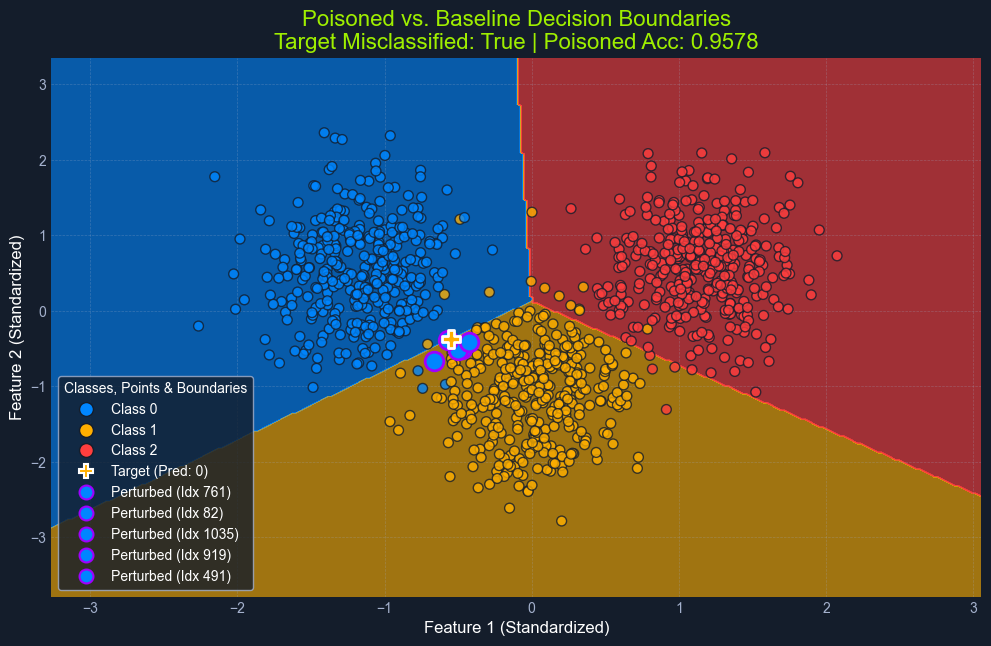

In [10]:
print("\n--- Visualizing Poisoned Model Decision Boundaries vs. Baseline ---")

# Predict classes on the meshgrid using the POISONED model
Z_poisoned_cl = poisoned_model_cl.predict(mesh_points_3c)
Z_poisoned_cl = Z_poisoned_cl.reshape(xx_3c.shape)

# Plot the decision boundary comparison
plot_decision_boundary_multi(
    X_train_poisoned,  # Show points from the poisoned training set
    y_train_poisoned,  # Use their labels (perturbed are still 0)
    Z_poisoned_cl,  # Use the poisoned model's mesh predictions for background
    xx_3c,
    yy_3c,
    title=f"Poisoned vs. Baseline Decision Boundaries\nTarget Misclassified: {attack_successful} | Poisoned Acc: {poisoned_accuracy_test:.4f}",
    highlight_indices=[target_point_index_absolute] + perturbed_indices_list,
    highlight_markers=["P"] + ["o"] * len(perturbed_indices_list),
    highlight_colors=[white] + [vivid_purple] * len(perturbed_indices_list),
    highlight_labels=[f"Target (Pred: {target_pred_poisoned})"]
    + [f"Perturbed (Idx {idx})" for idx in perturbed_indices_list],
)